In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Diagnostic Plots

We can check if a model works well for data in many different ways. A lot of attention is given to regression results including but not limited to: slope coefficients, p-value or R^2, which tell us how well a model represents a given data. That however is not the whole picture. Residuals can show us how poorly the model represents the data.

<strong> So what are Residuals? </strong> Residuals are leftover of the outcome variable after fitting a model (predictors) to a data. They help reveal the unexplained patterns in the data by the fitted model. Using this information, not only can one check if the assumptions of the linear regression are met but also gives one the opportunity to improve the model by the exploratory analysis methods.

## Types of Residual Plots

The diagnostic plots show residuals in four different ways.  They are as follows:

## Residuals vs Fitted:

This plot shows whether the residuals have any non-linear patterns. There could be a non-linear relationship between the predictor variables and an outcome variable. This relationship would show in this plot if the model itself doesn't capture the non-linear relationship. If in the plot, you find equally spread residuals around a horizontal line without distinct patters, chances are there isn't any non-linearity present.

In [3]:
auto = pd.read_csv("auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#Perform linear regression for all the variables except name as that is
#categorical
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
results = smf.ols(formula, data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          2.04e-139
Time:                        13:04:44   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

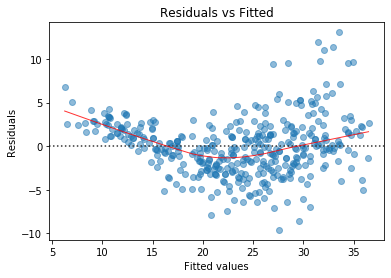

In [5]:
#it is time to plot the diagonostic plots
#Residual vs Fitted Plot
# model values
model_fitted_y = results.fittedvalues
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto,
                          lowess=True,
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

If the assumption holds (linear relationship), we should see a relatively flat line when looking at the residual vs fitted graph, which as you can see is not the case over here.

## Normal QQ Plot

The job of this graph is to show if the residuals are normally distributed or not.

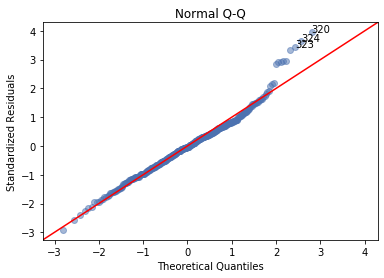

In [6]:
#QQ plot
# normalized residuals
from statsmodels.graphics.gofplots import ProbPlot
model_norm_residuals = results.get_influence().resid_studentized_internal

QQ = ProbPlot(model_norm_residuals)

plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

A good QQ plot has all the residuals lying on or close to the red line, which is the case in this situation.

## Scale Location

This plot is to check if the residuals suffer from non-constant variance.

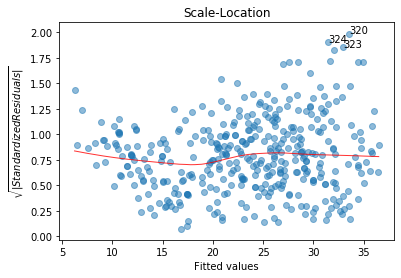

In [7]:
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]))

The graph is supposed to be good if you can see a relatively horizontal line with equally spread out points.

## Residuals vs Leverage

This plot helps us to find the influential subjects if any. Not all outliers are influential in linear regression analysis. Even though data have extreme values, they might not be influential to determine a regression line. That means, the results wouldn’t be much different if we either include or exclude them from analysis. They follow the trend in the majority of cases and they don’t really matter; they are not influential.

On the other hand, some cases could be very influential even if they look to be within a reasonable range of the values. They could be extreme cases against a regression line and can alter the results if we exclude them from analysis.



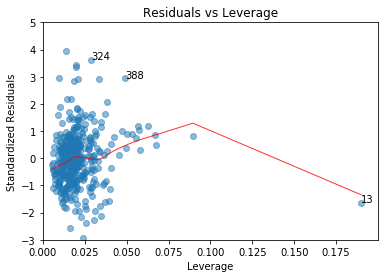

In [8]:
model_leverage = results.get_influence().hat_matrix_diag
model_norm_residuals = results.get_influence().resid_studentized_internal
# cook's distance, from statistical internals
model_cooks = results.get_influence().cooks_distance[0]
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                             xy=(model_leverage[i],
                                 model_norm_residuals[i]))

You can barely see Cook’s distance lines in a good case (a red dashed line) because all cases are well inside of the Cook’s distance lines.